In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('bs140513_032310.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df.rename(columns={'customer': 'customerSource', 'merchant': 'merchantTarget', 'amount': 'amount(Weight)', 'category': 'typeTrans'}, inplace=True)
df.head()

,step,customerSource,age,gender,zipcodeOri,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df.drop('step', axis=1, inplace=True)
df.head()

,customerSource,age,gender,zipcodeOri,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud
0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df.describe()

,amount(Weight),fraud
count,217872.000000,217872.000000
mean,38.988300,0.013623
std,122.780456,0.115919
min,0.000000,0.000000
25%,13.750000,0.000000
50%,26.960000,0.000000
75%,42.710000,0.000000
max,7665.560000,1.000000


In [ ]:
check_nan = df.isnull().values.any()
check_nan

np.False_

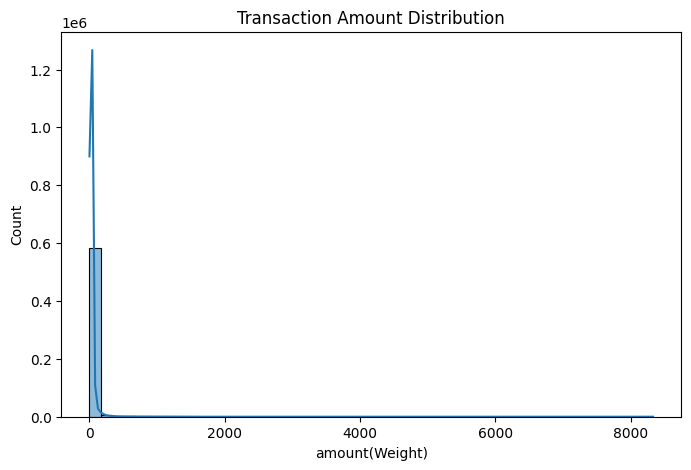

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["amount(Weight)"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

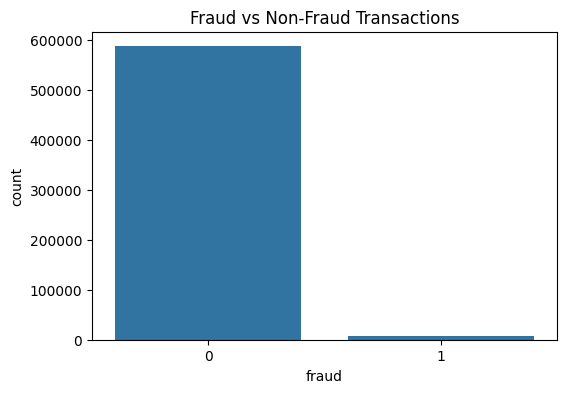

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="fraud", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

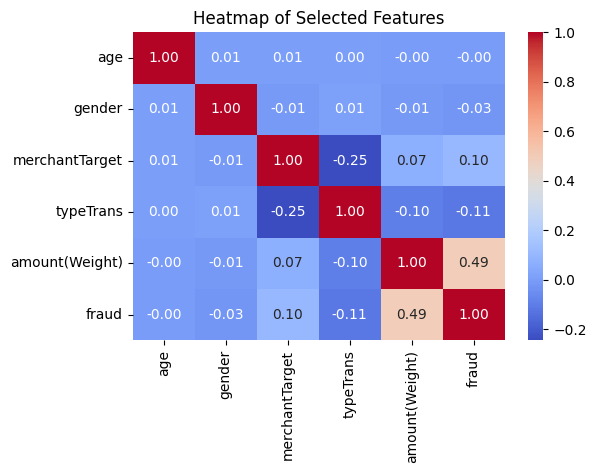

In [ ]:
selected_columns = ["age", "gender", "merchantTarget", "typeTrans", "amount(Weight)", "fraud"]

from sklearn.preprocessing import LabelEncoder

df_encoded = df[selected_columns].copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

corr_matrix = df_encoded.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Selected Features")
plt.show()

In [ ]:
df.drop('zipcodeOri', axis=1, inplace=True)
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud
0,'C1093826151','4','M','M348934600','28007','es_transportation',4.55,0
1,'C352968107','2','M','M348934600','28007','es_transportation',39.68,0
2,'C2054744914','4','F','M1823072687','28007','es_transportation',26.89,0
3,'C1760612790','3','M','M348934600','28007','es_transportation',17.25,0
4,'C757503768','5','M','M348934600','28007','es_transportation',35.72,0


In [ ]:
unique_values = df['typeTrans'].unique()
print("\nUnique values in 'typeTrans' column:")
print(unique_values)


Unique values in 'typeTrans' column:
["'es_transportation'" "'es_health'" "'es_otherservices'" "'es_food'"
 "'es_hotelservices'" "'es_barsandrestaurants'" "'es_tech'"
 "'es_sportsandtoys'" "'es_wellnessandbeauty'" "'es_hyper'" "'es_fashion'"
 "'es_home'" "'es_contents'" "'es_travel'" "'es_leisure'"]


In [ ]:
df['customerSource'] = df['customerSource'].str.strip("'")
df['merchantTarget'] = df['merchantTarget'].str.strip("'")
df['typeTrans'] = df['typeTrans'].str.strip("'")
df['gender'] = df['gender'].str.strip("'")
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_typeTrans = LabelEncoder()
le_gender = LabelEncoder()
le_customerSource = LabelEncoder()
le_merchantTarget = LabelEncoder()

In [ ]:
df['typeTrans_n'] = le_typeTrans.fit_transform(df['typeTrans'])
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud,typeTrans_n
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0,12
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0,12
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0,12
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0,12
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0,12


In [ ]:
df['gender_n'] = le_gender.fit_transform(df['gender'])
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0,12,2
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0,12,2
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0,12,1
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0,12,2
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0,12,2


In [ ]:
df['customerSource_n'] = le_typeTrans.fit_transform(df['customerSource'])
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0,12,2,209
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0,12,2,2749
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0,12,1,2282
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0,12,2,1648
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0,12,2,3580


In [ ]:
df['merchantTarget_n'] = le_typeTrans.fit_transform(df['merchantTarget'])
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0,12,2,209,30
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0,12,2,2749,30
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0,12,1,2282,18
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0,12,2,1648,30
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0,12,2,3580,30


In [ ]:
#df.drop('gender', axis=1, inplace=True)
#df.head()

In [ ]:
#df.drop('typeTrans', axis=1, inplace=True)
#df.head()

In [ ]:
#df.drop('customerSource', axis=1, inplace=True)
#df.head()

In [ ]:
#df.drop('merchantTarget', axis=1, inplace=True)
#df.head()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
df.dropna(subset=['fraud'], inplace=True)

labels = df['fraud'].values

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

In [ ]:
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
class_weight_dict

{0: np.float64(0.5069054089267766), 1: np.float64(36.703504043126685)}

# **SUPERVISED**

In [ ]:
df.head()

,customerSource,age,gender,merchantTarget,zipMerchant,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,C1093826151,'4',M,M348934600,'28007',es_transportation,4.55,0,12,2,209,30
1,C352968107,'2',M,M348934600,'28007',es_transportation,39.68,0,12,2,2749,30
2,C2054744914,'4',F,M1823072687,'28007',es_transportation,26.89,0,12,1,2282,18
3,C1760612790,'3',M,M348934600,'28007',es_transportation,17.25,0,12,2,1648,30
4,C757503768,'5',M,M348934600,'28007',es_transportation,35.72,0,12,2,3580,30


In [ ]:
df.drop('zipMerchant', axis=1, inplace=True)
df.head()

,customerSource,age,gender,merchantTarget,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,C1093826151,'4',M,M348934600,es_transportation,4.55,0,12,2,209,30
1,C352968107,'2',M,M348934600,es_transportation,39.68,0,12,2,2749,30
2,C2054744914,'4',F,M1823072687,es_transportation,26.89,0,12,1,2282,18
3,C1760612790,'3',M,M348934600,es_transportation,17.25,0,12,2,1648,30
4,C757503768,'5',M,M348934600,es_transportation,35.72,0,12,2,3580,30


In [ ]:
df.drop('age', axis=1, inplace=True)
df.head()

,customerSource,gender,merchantTarget,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,C1093826151,M,M348934600,es_transportation,4.55,0,12,2,209,30
1,C352968107,M,M348934600,es_transportation,39.68,0,12,2,2749,30
2,C2054744914,F,M1823072687,es_transportation,26.89,0,12,1,2282,18
3,C1760612790,M,M348934600,es_transportation,17.25,0,12,2,1648,30
4,C757503768,M,M348934600,es_transportation,35.72,0,12,2,3580,30


In [ ]:
X = df.drop(['fraud', 'customerSource', 'merchantTarget', 'typeTrans', 'gender'], axis=1)
X.head()

,amount(Weight),typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,4.55,12,2,209,30
1,39.68,12,2,2749,30
2,26.89,12,1,2282,18
3,17.25,12,2,1648,30
4,35.72,12,2,3580,30


In [ ]:
y = df['fraud']
y.head()

,fraud
0,0
1,0
2,0
3,0
4,0


# **SMOTE Section**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("bs140513_032310.csv")


# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Apply SMOTE with light oversampling
smote = SMOTE(sampling_strategy=0.2, random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

# Thresholding for custom precision-recall trade-off
threshold = 0.85  # Tune this between 0.55 and 0.75
y_pred_thresh = (y_proba > threshold).astype(int)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred_thresh, digits=4))

              precision    recall  f1-score   support

           0     0.9856    0.9985    0.9920     40432
           1     0.9921    0.9271    0.9585      8110

    accuracy                         0.9866     48542
   macro avg     0.9888    0.9628    0.9753     48542
weighted avg     0.9867    0.9866    0.9864     48542



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_smote.fit(X_res, y_res)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_smote = model_smote.predict(X_test)
print("SMOTE-based Model Evaluation")
print(classification_report(y_test, y_pred_smote, digits=4))


SMOTE-based Model Evaluation
              precision    recall  f1-score   support

           0     0.9990    0.9901    0.9945    117489
           1     0.5323    0.9222    0.6750      1440

    accuracy                         0.9892    118929
   macro avg     0.7657    0.9561    0.8348    118929
weighted avg     0.9934    0.9892    0.9907    118929



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("bs140513_032310.csv")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42, stratify=y_resampled
)

# Train a simple RandomForest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=6))


Classification Report:
               precision    recall  f1-score   support

           0   0.997798  0.992555  0.995170     88117
           1   0.992594  0.997810  0.995195     88116

    accuracy                       0.995183    176233
   macro avg   0.995196  0.995183  0.995182    176233
weighted avg   0.995196  0.995183  0.995182    176233



# **SMOTE Ends**

In [ ]:
scale_pos_weight = (class_weights[0] / class_weights[1])*2
scale_pos_weight

np.float64(0.02451301658203434)

In [ ]:
cross_val_score(LogisticRegression(class_weight='balanced'), X, y, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.956041  , 0.95368665, 0.95352689, 0.94943159, 0.9477499 ])

In [ ]:
cross_val_score(RandomForestClassifier(class_weight='balanced', n_estimators=50), X, y, cv=5)

array([0.99413936, 0.99566969, 0.99563605, 0.99587986, 0.99588827])

In [ ]:
cross_val_score(XGBClassifier(scale_pos_weight=0.02451301658203434), X, y, cv=5)

array([0.99374417, 0.99354237, 0.99352555, 0.99327324, 0.99297054])

In [ ]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

cross_val_score(LGBMClassifier(class_weight='balanced', n_estimators=50, random_state=42), X, y, cv=5)

[LightGBM] [Info] Number of positive: 5760, number of negative: 469954
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 475714, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 5760, number of negative: 469954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 475714, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[Lig

array([0.94764103, 0.964668  , 0.97562411, 0.98075306, 0.98317469])

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.3 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load and split data (Assuming X, y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "use_label_encoder": False,
        "eval_metric": "aucpr"
    }

    # Train XGBoost model
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    return np.mean(scores)  # Return average accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Train the best XGBoost model
best_params = study.best_params
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb.fit(X_train, y_train)

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Print only the classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred, digits=6))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0   0.997417  0.999038  0.998227    117512
           1   0.907830  0.785462  0.842225      1417

    accuracy                       0.996494    118929
   macro avg   0.952624  0.892250  0.920226    118929
weighted avg   0.996350  0.996494  0.996368    118929



In [ ]:
import optuna
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load and split data (Assuming X, y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 80),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "random_state": 42,
        "n_jobs": -1
    }

    # Train Random Forest model
    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    return np.mean(scores)  # Return average accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

# Train the best Random Forest model
best_params = study.best_params
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Print only the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred, digits=6))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0   0.996757  0.999166  0.997960    117512
           1   0.913504  0.730416  0.811765      1417

    accuracy                       0.995964    118929
   macro avg   0.955131  0.864791  0.904862    118929
weighted avg   0.995765  0.995964  0.995742    118929



In [ ]:
import optuna
import numpy as np
from sklearn.metrics import classification_report

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load and split data (Assuming X, y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-4, 100.0, log=True),
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "solver": trial.suggest_categorical("solver", ["liblinear", "saga"]),
        "max_iter": trial.suggest_int("max_iter", 100, 1000)
    }

    # To avoid incompatible penalty-solver combinations
    if params["penalty"] == "l1" and params["solver"] not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()
    if params["penalty"] == "l2" and params["solver"] not in ["lbfgs", "liblinear", "sag", "saga"]:
        raise optuna.exceptions.TrialPruned()

    model = LogisticRegression(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return np.mean(scores)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Train the best Logistic Regression model
best_params = study.best_params
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

# Predict on test set
y_pred = best_logreg.predict(X_test)

# Print only the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred, digits=6))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0   0.994005  0.998753  0.996373     32870
         1.0   0.868167  0.576923  0.693196       468

    accuracy                       0.992831     33338
   macro avg   0.931086  0.787838  0.844785     33338
weighted avg   0.992238  0.992831  0.992117     33338



In [ ]:
import optuna
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Split data (Assuming X_processed and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 30),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "random_state": 42,
        "n_jobs": -1
    }

    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return np.mean(scores)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

# Train the best LightGBM model
best_params = study.best_params
best_lgbm = lgb.LGBMClassifier(**best_params, random_state=42, n_jobs=-1)
best_lgbm.fit(X_train, y_train)

# Predict on test set
y_pred = best_lgbm.predict(X_test)

# Print only the classification report
print("Classification Report for LightGBM (Before Augmentation):")
print(classification_report(y_test, y_pred, digits=6))


[LightGBM] [Info] Number of positive: 4627, number of negative: 375944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 380571, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012158 -> initscore=-4.397531
[LightGBM] [Info] Start training from score -4.397531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
df.head()

,customerSource,gender,merchantTarget,typeTrans,amount(Weight),fraud,typeTrans_n,gender_n,customerSource_n,merchantTarget_n
0,C1093826151,M,M348934600,es_transportation,4.55,0,12,2,209,30
1,C352968107,M,M348934600,es_transportation,39.68,0,12,2,2749,30
2,C2054744914,F,M1823072687,es_transportation,26.89,0,12,1,2282,18
3,C1760612790,M,M348934600,es_transportation,17.25,0,12,2,1648,30
4,C757503768,M,M348934600,es_transportation,35.72,0,12,2,3580,30


In [ ]:
# Load the dataset again
original_df = pd.read_csv("bs140513_032310.csv")

In [ ]:
print(original_df.columns)  # Check available columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')


In [ ]:
df['category'] = original_df['category']  # Instead of typeTrans
df['gender'] = original_df['gender']
df['customer'] = original_df['customer']
df['merchant'] = original_df['merchant']

In [ ]:
original_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
original_df['customer'] = original_df['customer'].str.strip("'")
original_df['merchant'] = original_df['merchant'].str.strip("'")
original_df['category'] = original_df['category'].str.strip("'")
original_df['gender'] = original_df['gender'].str.strip("'")
original_df.drop(['age', 'zipcodeOri', 'zipMerchant'], axis=1, inplace=True)
original_df.head()

,step,customer,gender,merchant,category,amount,fraud
0,0,C1093826151,M,M348934600,es_transportation,4.55,0
1,0,C352968107,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,M,M348934600,es_transportation,17.25,0
4,0,C757503768,M,M348934600,es_transportation,35.72,0


In [ ]:
print(original_df.dtypes)

step          int64
customer     object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object


In [ ]:
original_df.head()

,step,customer,gender,merchant,category,amount,fraud
0,0,C1093826151,M,M348934600,es_transportation,4.55,0
1,0,C352968107,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,M,M348934600,es_transportation,17.25,0
4,0,C757503768,M,M348934600,es_transportation,35.72,0


# **DON'T RUN**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix

# Load your dataset
original_df = original_df[['step', 'customer', 'gender', 'merchant', 'category', 'amount', 'fraud']]

# Define features
X = original_df.drop('fraud', axis=1)
y = original_df['fraud']
numerical_features = ['step', 'amount']
categorical_features = ['customer', 'gender', 'merchant', 'category']

# Preprocessing
numerical_pipeline = StandardScaler()
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# VAE parameters
latent_dim = 5
input_dim = X_processed.shape[1]

# VAE model
class TabularVAE(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = self.build_encoder(input_dim, latent_dim)
        self.decoder = self.build_decoder(input_dim, latent_dim)

    def build_encoder(self, input_dim, latent_dim):
        inputs = keras.Input(shape=(input_dim,))
        x = layers.Dense(128, activation="relu")(inputs)
        x = layers.Dense(64, activation="relu")(x)
        z_mean = layers.Dense(latent_dim)(x)
        z_log_var = layers.Dense(latent_dim)(x)
        return keras.Model(inputs, [z_mean, z_log_var])

    def build_decoder(self, input_dim, latent_dim):
        inputs = keras.Input(shape=(latent_dim,))
        x = layers.Dense(64, activation="relu")(inputs)
        x = layers.Dense(128, activation="relu")(x)
        outputs = layers.Dense(input_dim)(x)
        return keras.Model(inputs, outputs)

    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(tf.shape(self.encoder.input)[0], latent_dim))
        return eps

    def reparameterize(self, z_mean, z_log_var):
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl_loss))
        return self.decoder(z)

# Compile and train
vae = TabularVAE(input_dim=input_dim, latent_dim=latent_dim)
vae.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse')
# Convert X_processed to a dense NumPy array if it's a sparse matrix
if isinstance(X_processed, csr_matrix):
    X_processed = X_processed.toarray()

# Minimal training config for debugging
vae.fit(X_processed[:2000], X_processed[:2000], epochs=3, batch_size=16)

# Generate synthetic data
z_samples = tf.random.normal(shape=(10000, latent_dim))
generated_data = vae.decoder(z_samples).numpy()

# Inverse transform
# numerical_data = generated_data[:, :len(numerical_features)]
# cat_data = generated_data[:, len(numerical_features):]

# inv_numerical = preprocessor.transformers_[0][1].inverse_transform(numerical_data)
# inv_cat = np.round(cat_data)
# inv_cat = preprocessor.transformers_[1][1].inverse_transform(inv_cat)

augmented_df = pd.DataFrame(generated_data)
augmented_df.to_csv("synthetic_fraud_data.csv", index=False)


Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0027
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.7177e-04
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 6.8183e-04


# **RUN THIS**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix

# ✅ Use your real dataset
original_df = original_df[['step', 'customer', 'gender', 'merchant', 'category', 'amount', 'fraud']]

# ➕ Separate X and y
X = original_df.drop(columns='fraud')
y = original_df['fraud']

# ➕ Define feature types
numerical_features = ['step', 'amount']
categorical_features = ['customer', 'gender', 'merchant', 'category']

# ✅ Preprocessing pipeline
numerical_pipeline = StandardScaler()
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# ✅ VAE architecture
latent_dim = 5
input_dim = X_processed.shape[1]

class TabularVAE(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = self.build_encoder(input_dim, latent_dim)
        self.decoder = self.build_decoder(input_dim, latent_dim)

    def build_encoder(self, input_dim, latent_dim):
        inputs = keras.Input(shape=(input_dim,))
        x = layers.Dense(128, activation="relu")(inputs)
        x = layers.Dense(64, activation="relu")(x)
        z_mean = layers.Dense(latent_dim)(x)
        z_log_var = layers.Dense(latent_dim)(x)
        return keras.Model(inputs, [z_mean, z_log_var])

    def build_decoder(self, input_dim, latent_dim):
        inputs = keras.Input(shape=(latent_dim,))
        x = layers.Dense(64, activation="relu")(inputs)
        x = layers.Dense(128, activation="relu")(x)
        outputs = layers.Dense(input_dim)(x)
        return keras.Model(inputs, outputs)

    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(tf.shape(self.encoder.input)[0], latent_dim))
        return eps

    def reparameterize(self, z_mean, z_log_var):
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl_loss))
        return self.decoder(z)

# ✅ Train only on fraud samples
X_fraud = X[y == 1]
X_fraud_processed = preprocessor.transform(X_fraud)
if isinstance(X_fraud_processed, csr_matrix):
    X_fraud_processed = X_fraud_processed.toarray()

# ✅ Compile and fit
vae = TabularVAE(input_dim=input_dim, latent_dim=latent_dim)
vae.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse')
vae.fit(X_fraud_processed[:2000], X_fraud_processed[:2000], epochs=5, batch_size=32)

# ✅ Generate synthetic fraud data
z_samples = tf.random.normal(shape=(2000, latent_dim))
generated_data = vae.decoder(z_samples).numpy()

# ✅ Create a DataFrame (no inverse transforms)
augmented_df = pd.DataFrame(generated_data, columns=[f"feature_{i}" for i in range(generated_data.shape[1])])
augmented_df['fraud'] = 1  # Label it as fraud

# ✅ Save to CSV
# augmented_df.to_csv("synthetic_fraud_data.csv", index=False)

print("Augmented fraud data saved! You can now combine it with df for training.")


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0404
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0181
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0151
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0177
Augmented fraud data saved! You can now combine it with df for training.


# **DON'T RUN**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import optuna

# ✅ Clean and subset data
original_df = original_df[['step', 'customer', 'gender', 'merchant', 'category', 'amount', 'fraud']]
X = original_df.drop(columns='fraud')
y = original_df['fraud']

numerical = ['step', 'amount']
categorical = ['customer', 'gender', 'merchant', 'category']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
])

X_processed = preprocessor.fit_transform(X)
input_dim = X_processed.shape[1]
latent_dim = 3  # Reduced

# ✅ VAE (Lightweight)
class SimpleVAE(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = self._build_encoder(input_dim, latent_dim)
        self.decoder = self._build_decoder(input_dim, latent_dim)

    def _build_encoder(self, input_dim, latent_dim):
        inp = keras.Input(shape=(input_dim,))
        x = layers.Dense(32, activation="relu")(inp)
        z_mean = layers.Dense(latent_dim)(x)
        z_log_var = layers.Dense(latent_dim)(x)
        return keras.Model(inp, [z_mean, z_log_var])

    def _build_decoder(self, input_dim, latent_dim):
        inp = keras.Input(shape=(latent_dim,))
        x = layers.Dense(32, activation="relu")(inp)
        out = layers.Dense(input_dim)(x)
        return keras.Model(inp, out)

    def reparam(self, z_mean, z_log_var):
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparam(z_mean, z_log_var)
        kl = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl))
        return self.decoder(z)

# ✅ Train on fraud samples only
fraud_only = X[y == 1]
X_fraud = preprocessor.transform(fraud_only)

vae = SimpleVAE(input_dim, latent_dim)
vae.compile(optimizer=keras.optimizers.Adam(1e-3), loss="mse")

# 🧠 Train with fewer rows/epochs/batch
vae.fit(X_fraud[:500], X_fraud[:500], epochs=2, batch_size=16, verbose=1)

# 🔁 Generate synthetic frauds
z = tf.random.normal(shape=(500, latent_dim))
generated = vae.decoder(z).numpy()

# 🧾 Label synthetic as fraud
augmented = pd.DataFrame(generated)
augmented["fraud"] = 1

# 🔁 Combine with original
X_all = np.vstack([X_processed, generated])
y_all = np.concatenate([y, np.ones(len(generated))])

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# **RUN BELOW**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from scipy import sparse
import optuna
import gc

# 🧹 Clean memory
keras.backend.clear_session()
gc.collect()

# ✅ Load minimal data and preprocess
original_df = original_df[['step', 'customer', 'gender', 'merchant', 'category', 'amount', 'fraud']]
X = original_df.drop(columns='fraud')
y = original_df['fraud']

numerical = ['step', 'amount']
categorical = ['customer', 'gender', 'merchant', 'category']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)  # use sparse=True by default
])

X_processed = preprocessor.fit_transform(X)  # → this will now be a sparse matrix
input_dim = X_processed.shape[1]
latent_dim = 5

# ✅ VAE (Light)
class SimpleVAE(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = self._build_encoder(input_dim, latent_dim)
        self.decoder = self._build_decoder(input_dim, latent_dim)

    def _build_encoder(self, input_dim, latent_dim):
        inp = keras.Input(shape=(input_dim,))
        x = layers.Dense(32, activation="relu")(inp)
        z_mean = layers.Dense(latent_dim)(x)
        z_log_var = layers.Dense(latent_dim)(x)
        return keras.Model(inp, [z_mean, z_log_var])

    def _build_decoder(self, input_dim, latent_dim):
        inp = keras.Input(shape=(latent_dim,))
        x = layers.Dense(32, activation="relu")(inp)
        out = layers.Dense(input_dim)(x)
        return keras.Model(inp, out)

    def reparam(self, z_mean, z_log_var):
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparam(z_mean, z_log_var)
        kl = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl))
        return self.decoder(z)

# ✅ Only train on a subset of fraud
X_fraud = X[y == 1]
X_fraud_sparse = preprocessor.transform(X_fraud)
X_fraud_sparse = X_fraud_sparse[:2000]
X_fraud_np = X_fraud_sparse.toarray()  # convert only what's needed

vae = SimpleVAE(input_dim, latent_dim)
vae.compile(optimizer=keras.optimizers.Adam(1e-3), loss="mse")
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
vae.fit(X_fraud_np, X_fraud_np, epochs=30, batch_size=32, callbacks=[early_stop], verbose=1)

# 🔁 Generate synthetic
z = tf.random.normal(shape=(2000, latent_dim))
generated = vae.decoder(z).numpy()

# 🔁 Combine with original (use sparse stacking)
X_all = sparse.vstack([X_processed, sparse.csr_matrix(generated)])  # both are sparse now
y_all = np.concatenate([y, np.ones(len(generated))])


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0448
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0184
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0182
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0166
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0193
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0157
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0186
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0155
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159
Epoch 16/30

In [ ]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8890512 stored elements and shape (379024, 4183)>

In [ ]:
# 🔍 Optuna + XGB
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "use_label_encoder": False,
        "eval_metric": "aucpr"
    }
    model = XGBClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
best_xgb_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train, y_train)

# 📊 Evaluate
y_pred = best_xgb_model.predict(X_test)
print("Classification Report for XGBoost after Augmentation is: ")
print(classification_report(y_test, y_pred, digits=6))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost after Augmentation is: 
              precision    recall  f1-score   support

         0.0   0.997375  0.998916  0.998145     93206
         1.0   0.928216  0.842037  0.883029      1551

    accuracy                       0.996349     94757
   macro avg   0.962796  0.920477  0.940587     94757
weighted avg   0.996243  0.996349  0.996261     94757



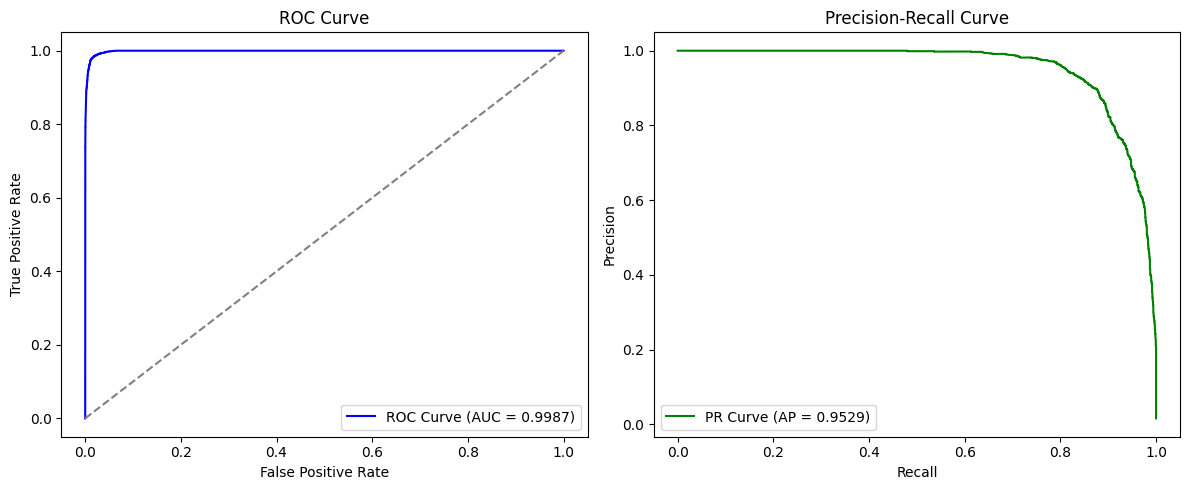

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 🔍 Get predicted probabilities
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# 🟩 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 🟨 PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# 📊 Plotting
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# PR
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.4f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


# **XGB NEW**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, make_scorer, recall_score
from xgboost import XGBClassifier
# Assuming 'X' and 'y' are your original data
# Assuming 'preprocessor' is your ColumnTransformer

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Split the ORIGINAL dataset, but use the processed data in the objective function
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Process the split data
X_train = preprocessor.transform(X_train_original)
X_test = preprocessor.transform(X_test_original)

# Define the Optuna objective with RECALL scoring, using the processed data
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "scale_pos_weight": float(np.sum(y_train == 0)) / np.sum(y_train == 1),
        "use_label_encoder": False,  # XGBoost handles encoded data
        "eval_metric": "logloss"  # Appropriate for binary classification
    }

    model = XGBClassifier(**params)
    # Use the PROCESSED X_train here
    return cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(recall_score)).mean()

# Run optimization (unchanged)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:27:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:27:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:28:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
# Train final model with best parameters
best_xgb_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train, y_train)  # Use processed X_train for fitting

# Predict probabilities (use processed X_test)
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning to maximize recall and precision together
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Predict using optimal threshold
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Final evaluation
print(f"\nBest Threshold: {best_threshold:.4f}")
print("Classification Report at Best Threshold:")
print(classification_report(y_test, y_pred_thresh, digits=6))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Threshold: 0.2656
Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0   0.997142  0.997915  0.997528    117489
           1   0.818384  0.766667  0.791682      1440

    accuracy                       0.995115    118929
   macro avg   0.907763  0.882291  0.894605    118929
weighted avg   0.994978  0.995115  0.995036    118929



In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, precision_recall_curve, make_scorer, recall_score, f1_score
from xgboost import XGBClassifier
import optuna

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Assuming 'X' and 'y' are your original data
# Assuming 'preprocessor' is your ColumnTransformer

# Split the ORIGINAL dataset, but use the processed data in the objective function
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Process the split data
X_train = preprocessor.transform(X_train_original)
X_test = preprocessor.transform(X_test_original)

# Define the Optuna objective with F1 scoring, focusing on 'scale_pos_weight'
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        # Focus on scale_pos_weight for imbalance handling
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 50, log=True),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    # Using StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))

    return np.mean(scores)  # Return average F1 score

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
# Train final model with best parameters
best_xgb_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train, y_train)

# Predict probabilities (use processed X_test)
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning to maximize recall and precision together
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Predict using optimal threshold
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Final evaluation
print(f"\nBest Threshold: {best_threshold:.4f}")
print("Classification Report at Best Threshold:")
print(classification_report(y_test, y_pred_thresh, digits=6))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Threshold: 0.5234
Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0   0.998102  0.998017  0.998059    117489
           1   0.839310  0.845139  0.842215      1440

    accuracy                       0.996166    118929
   macro avg   0.918706  0.921578  0.920137    118929
weighted avg   0.996179  0.996166  0.996172    118929



In [ ]:
from sklearn.ensemble import RandomForestClassifier

optuna.logging.set_verbosity(optuna.logging.WARNING)

def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }
    model = RandomForestClassifier(**params, class_weight='balanced', random_state=42)
    return cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()

rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(rf_objective, n_trials=15)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(**rf_study.best_params)
best_rf_model.fit(X_train, y_train)

# 📊 Evaluate
y_pred = best_rf_model.predict(X_test)
print("Classification Report for Random Forest after Augmentation is: ")
print(classification_report(y_test, y_pred, digits=6))


Classification Report for Random Forest after Augmentation is: 
              precision    recall  f1-score   support

         0.0   0.987969  1.000000  0.993948     93206
         1.0   1.000000  0.268214  0.422979      1551

    accuracy                       0.988022     94757
   macro avg   0.993985  0.634107  0.708464     94757
weighted avg   0.988166  0.988022  0.984602     94757



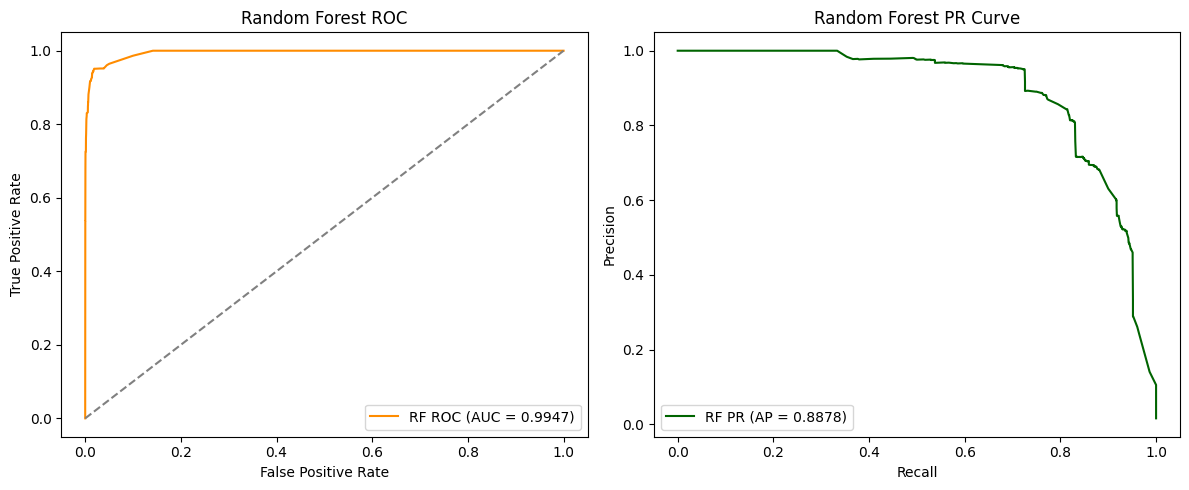

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
# 🔍 Get predicted probabilities
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# PR
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)
avg_precision_rf = average_precision_score(y_test, y_probs_rf)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f'RF ROC (AUC = {roc_auc_rf:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, label=f'RF PR (AP = {avg_precision_rf:.4f})', color='darkgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train
lr_model = LogisticRegression(max_iter=100, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print(" Classification Report for Logistic Regression after Augmentation:")
print(classification_report(y_test, y_pred_lr, digits=6))


 Classification Report for Logistic Regression after Augmentation:
              precision    recall  f1-score   support

         0.0   0.999577  0.988563  0.994039     93206
         1.0   0.586501  0.974855  0.732381      1551

    accuracy                       0.988339     94757
   macro avg   0.793039  0.981709  0.863210     94757
weighted avg   0.992816  0.988339  0.989757     94757



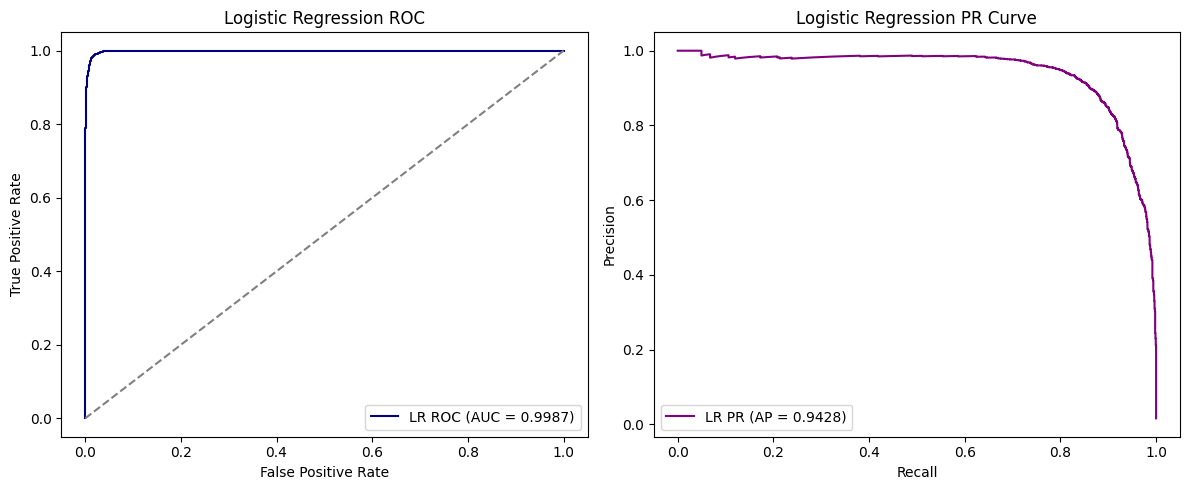

In [ ]:
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_probs_lr)
avg_precision_lr = average_precision_score(y_test, y_probs_lr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, label=f'LR ROC (AUC = {roc_auc_lr:.4f})', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, label=f'LR PR (AP = {avg_precision_lr:.4f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PR Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 🔍 Optuna + LightGBM (after augmentation)
import optuna
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 20),
        "random_state": 42,
        "n_jobs": -1
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.079447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.979035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 18.996225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.796947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.786830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.613806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.042260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 8.690049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.142694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.177561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.737557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.903879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.103478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.293997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.969386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.677986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.394907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.369571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.032057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.890780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.801587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.878723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.728153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.210911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.119333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.851495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.893810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.945302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.646512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.925842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.920421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.658283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 8.701218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 8.998887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.237217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.371968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.074558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 8.640970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.913035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.060403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.476291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.966072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.747642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066352
[LightGBM] [Info] Number of data points in the train set: 252682, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076660
[LightGBM] [Info] Start training from score -4.076660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4216, number of negative: 248467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 8.975634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066392
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016685 -> initscore=-4.076423
[LightGBM] [Info] Start training from score -4.076423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4215, number of negative: 248468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.858515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066348
[LightGBM] [Info] Number of data points in the train set: 252683, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016681 -> initscore=-4.076664
[LightGBM] [Info] Start training from score -4.076664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Best model training
best_lgb_model = lgb.LGBMClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_lgb_model.fit(X_train, y_train)

# 📊 Evaluate
y_pred = best_lgb_model.predict(X_test)
print("Classification Report for LightGBM after Augmentation is:")
print(classification_report(y_test, y_pred, digits=6))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6323, number of negative: 372701
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 14.106157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066360
[LightGBM] [Info] Number of data points in the train set: 379024, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016682 -> initscore=-4.076583
[LightGBM] [Info] Start training from score -4.076583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report for LightGBM after Augmentation is:
              precision    recall  f1-score   support

         0.0   0.997525  0.998927  0.998226     93206
         1.0   0.929577  0.851064  0.888590      1551

    accuracy                       0.996507     94757
   macro avg   0.963551  0.924995  0.943408     94757
weighted avg   0.996413  0.996507  0.996431     94757



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


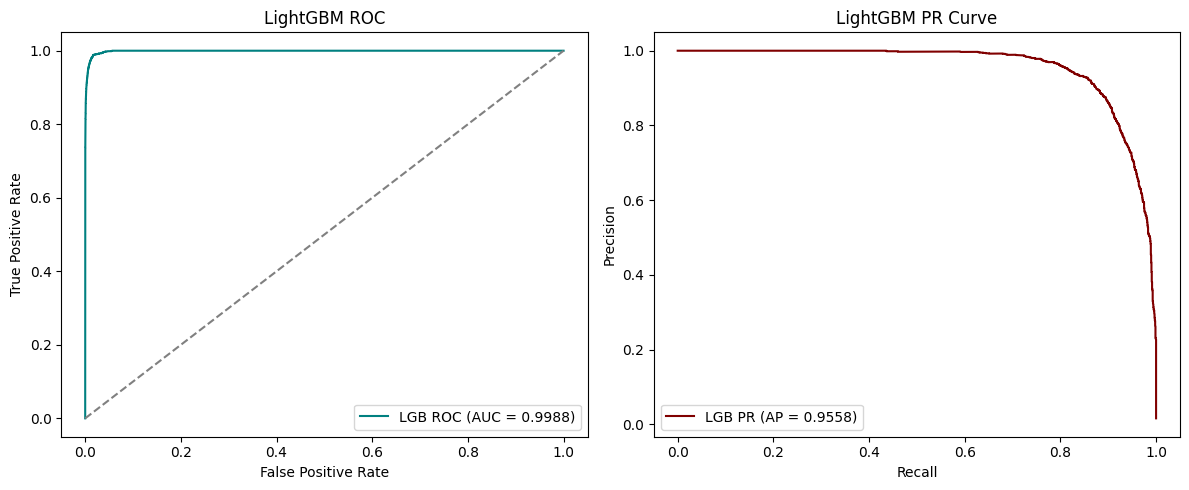

In [ ]:
y_probs_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_probs_lgb)
avg_precision_lgb = average_precision_score(y_test, y_probs_lgb)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_lgb, tpr_lgb, label=f'LGB ROC (AUC = {roc_auc_lgb:.4f})', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_lgb, precision_lgb, label=f'LGB PR (AP = {avg_precision_lgb:.4f})', color='maroon')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM PR Curve')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-69-fb671134229b>:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


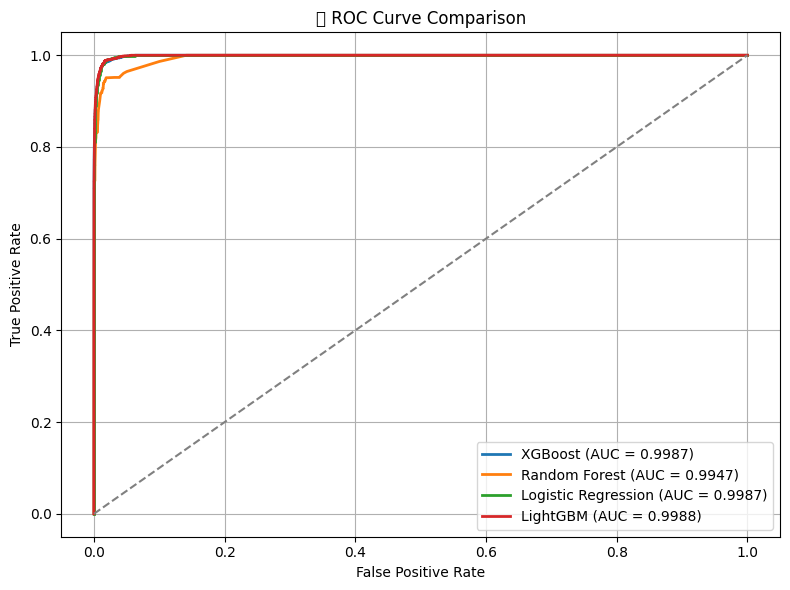

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for all models
y_probs_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_probs_rf  = best_rf_model.predict_proba(X_test)[:, 1]
y_probs_lr  = lr_model.predict_proba(X_test)[:, 1]
y_probs_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_probs_rf)
fpr_lr,  tpr_lr,  _ = roc_curve(y_test, y_probs_lr)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)

# AUC
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf  = auc(fpr_rf, tpr_rf)
auc_lr  = auc(fpr_lr, tpr_lr)
auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', lw=2)
plt.plot(fpr_rf,  tpr_rf,  label=f'Random Forest (AUC = {auc_rf:.4f})', lw=2)
plt.plot(fpr_lr,  tpr_lr,  label=f'Logistic Regression (AUC = {auc_lr:.4f})', lw=2)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.4f})', lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-70-d3b36314489c>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


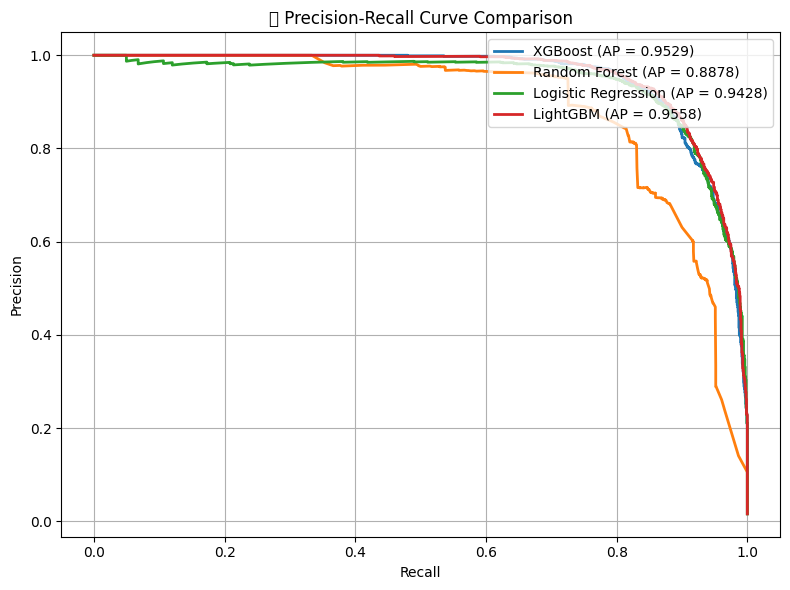

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curves
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_probs_xgb)
prec_rf,  rec_rf,  _ = precision_recall_curve(y_test, y_probs_rf)
prec_lr,  rec_lr,  _ = precision_recall_curve(y_test, y_probs_lr)
prec_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_probs_lgb)

# Average Precision Scores
ap_xgb = average_precision_score(y_test, y_probs_xgb)
ap_rf  = average_precision_score(y_test, y_probs_rf)
ap_lr  = average_precision_score(y_test, y_probs_lr)
ap_lgb = average_precision_score(y_test, y_probs_lgb)

# Plot PR curves
plt.figure(figsize=(8, 6))
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP = {ap_xgb:.4f})', lw=2)
plt.plot(rec_rf,  prec_rf,  label=f'Random Forest (AP = {ap_rf:.4f})', lw=2)
plt.plot(rec_lr,  prec_lr,  label=f'Logistic Regression (AP = {ap_lr:.4f})', lw=2)
plt.plot(rec_lgb, prec_lgb, label=f'LightGBM (AP = {ap_lgb:.4f})', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📊 Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **DON'T RUN**

In [ ]:
import numpy as np

# 🧪 Use a subset to avoid memory overload (optional, or switch to batch logic)
X_subset = X_processed[:2000]  # Adjust if needed based on Colab limits

# 🧠 Predict reconstruction from VAE
reconstructed = vae.predict(X_subset)

# 📉 Calculate reconstruction error per sample
reconstruction_errors = np.mean((X_subset - reconstructed) ** 2, axis=1)

# 🧾 Compute threshold using 95th percentile of the error distribution
threshold = np.percentile(reconstruction_errors, 95)

# 🚩 Flag as potential frauds if error is above the threshold
potential_frauds = reconstruction_errors > threshold

# 📦 Create a DataFrame to inspect flagged samples
flagged_df = pd.DataFrame({
    "Reconstruction_Error": reconstruction_errors,
    "Flagged_as_Fraud": potential_frauds.astype(int)
})

# 🧾 View summary
print(f"Threshold (95th percentile): {threshold:.6f}")
print(f"Total flagged: {potential_frauds.sum()} out of {len(X_subset)}")

# Optional: View top frauds
flagged_df_sorted = flagged_df.sort_values(by="Reconstruction_Error", ascending=False)
flagged_df_sorted.head()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


LinAlgError: Last 2 dimensions of the array must be square

# **RUN THIS**

In [ ]:
import numpy as np

# 🧪 Use a subset to avoid memory overload (optional, or switch to batch logic)
X_subset = X_processed[:5000]  # Adjust if needed based on Colab limits
X_subset_dense = X_subset.toarray() # Convert sparse matrix to dense NumPy array

# 🧠 Predict reconstruction from VAE
reconstructed = vae.predict(X_subset_dense)

# 📉 Calculate reconstruction error per sample
reconstruction_errors = np.mean(np.square(X_subset_dense - reconstructed), axis=1)

# 🧾 Compute threshold using 95th percentile of the error distribution
threshold = np.percentile(reconstruction_errors, 90)

# 🚩 Flag as potential frauds if error is above the threshold
potential_frauds = reconstruction_errors > threshold

# 📦 Create a DataFrame to inspect flagged samples
flagged_df = pd.DataFrame({
    "Reconstruction_Error": reconstruction_errors,
    "Flagged_as_Fraud": potential_frauds.astype(int)
})

# 🧾 View summary
print(f"Threshold (90th percentile): {threshold:.6f}")
print(f"Total flagged: {potential_frauds.sum()} out of {len(X_subset_dense)}")

# Optional: View top frauds
flagged_df_sorted = flagged_df.sort_values(by="Reconstruction_Error", ascending=False)
flagged_df_sorted.head()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Threshold (90th percentile): 0.008792
Total flagged: 500 out of 5000


,Reconstruction_Error,Flagged_as_Fraud
3744,0.739142,1
3743,0.152813,1
1697,0.045090,1
4046,0.017320,1
527,0.016496,1


In [ ]:
from scipy import sparse
import numpy as np

# 🧾 Assume `X_flagged_dense` is the corresponding VAE-decoded dense numpy array
# corresponding to the same rows in `flagged_df_sorted` that are flagged as fraud.
# For example:
X_flagged_dense = vae.decoder(tf.random.normal(shape=(len(flagged_df_sorted), latent_dim))).numpy()

# Convert to sparse to match X_train's format
X_flagged_sparse = sparse.csr_matrix(X_flagged_dense)

# ✅ Vertically stack the flagged data to X_train
X_train_FE = sparse.vstack([X_train, X_flagged_sparse])

# 🧾 Add labels for these synthetic frauds (1s)
y_train_FE = np.concatenate([y_train, np.ones(X_flagged_sparse.shape[0])])


In [ ]:
print(X_train_FE.shape)   # Should be (original + flagged, features)
print(y_train_FE.shape)   # Should match the number of rows in X_train_augmented


(384024, 4183)
(384024,)


In [ ]:
# Re-train on augmented data
best_xgb_model.fit(X_train_FE, y_train_FE)

# Evaluate
y_pred_FE = best_xgb_model.predict(X_test)
print("Classification Report for XGBoost after Feature Engineering:")
print(classification_report(y_test, y_pred_FE, digits=6))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost (Augmented):
              precision    recall  f1-score   support

         0.0   0.997514  0.998852  0.998183     93206
         1.0   0.924965  0.850419  0.886127      1551

    accuracy                       0.996422     94757
   macro avg   0.961240  0.924636  0.942155     94757
weighted avg   0.996327  0.996422  0.996349     94757



In [ ]:
best_rf_model.fit(X_train_FE, y_train_FE)

# Evaluate
y_pred_FE = best_rf_model.predict(X_test)
print("Classification Report for XGBoost after Feature Engineering:")
print(classification_report(y_test, y_pred_FE, digits=6))


Classification Report for XGBoost after Feature Engineering:
              precision    recall  f1-score   support

         0.0   0.987969  1.000000  0.993948     93206
         1.0   1.000000  0.268214  0.422979      1551

    accuracy                       0.988022     94757
   macro avg   0.993985  0.634107  0.708464     94757
weighted avg   0.988166  0.988022  0.984602     94757



In [ ]:
lr_model.fit(X_train_FE, y_train_FE)

# Evaluate
y_pred_FE = lr_model.predict(X_test)
print("Classification Report for XGBoost after Feature Engineering:")
print(classification_report(y_test, y_pred_FE, digits=6))


Classification Report for XGBoost after Feature Engineering:
              precision    recall  f1-score   support

         0.0   0.999394  0.990719  0.995038     93206
         1.0   0.633475  0.963894  0.764510      1551

    accuracy                       0.990280     94757
   macro avg   0.816434  0.977307  0.879774     94757
weighted avg   0.993404  0.990280  0.991264     94757



In [ ]:
best_lgb_model.fit(X_train_FE, y_train_FE)

# Evaluate
y_pred_FE = best_lgb_model.predict(X_test)
print("Classification Report for XGBoost after Feature Engineering:")
print(classification_report(y_test, y_pred_FE, digits=6))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11323, number of negative: 372701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 18.258695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066606
[LightGBM] [Info] Number of data points in the train set: 384024, number of used features: 4183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029485 -> initscore=-3.493940
[LightGBM] [Info] Start training from score -3.493940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report for XGBoost after Feature Engineering:
              precision    recall  f1-score   support

         0.0   0.997461  0.998809  0.998134     93206
         1.0   0.922105  0.847195  0.883065      1551

    accuracy                       0.996327     94757
   macro avg   0.959783  0.923002  0.940599     94757
weighted avg   0.996227  0.996327  0.996251     94757



# **ROC PR Curves for all models after FE**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


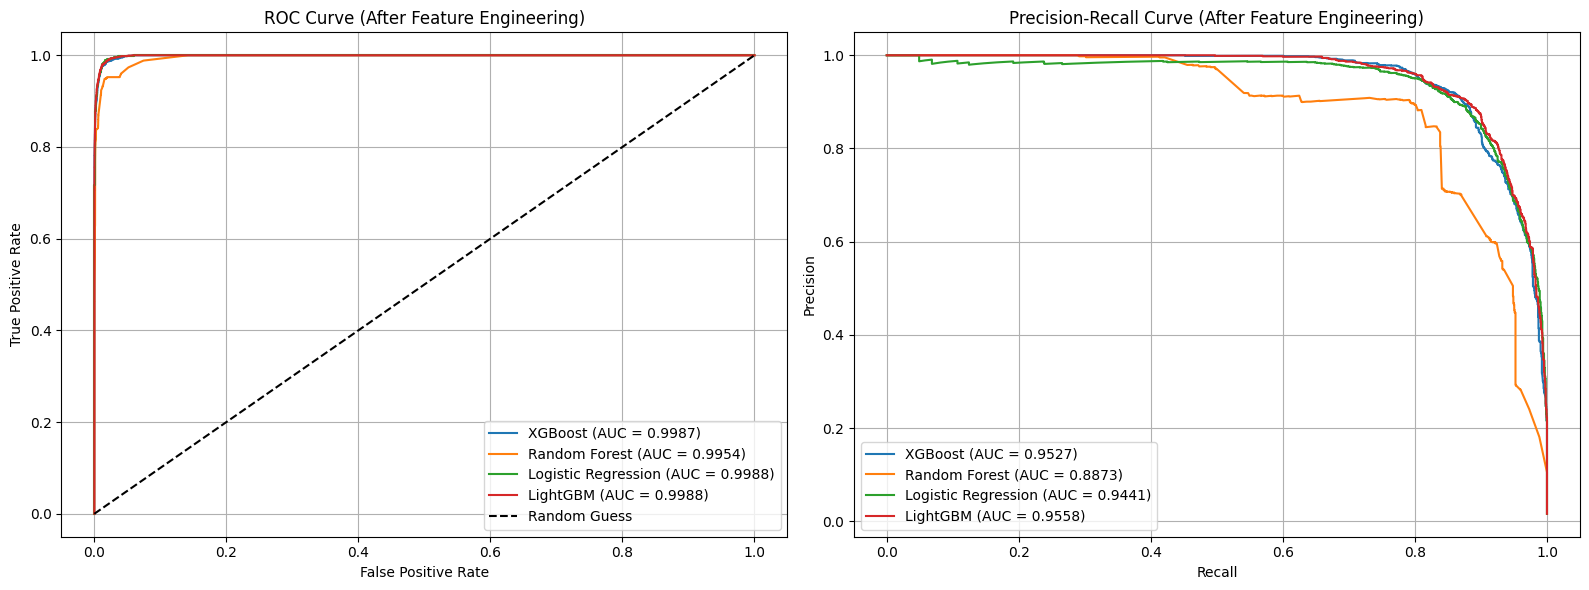

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming all models are trained on X_train_FE and y_train_FE
# And that y_test is unchanged, and X_test is already preprocessed for prediction

# Predict probabilities
models = {
    "XGBoost": best_xgb_model,
    "Random Forest": best_rf_model,
    "Logistic Regression": lr_model,
    "LightGBM": best_lgb_model
}

# Initialize plots
plt.figure(figsize=(16, 6))

# === ROC CURVE ===
plt.subplot(1, 2, 1)
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (After Feature Engineering)")
plt.legend()
plt.grid(True)

# === PR CURVE ===
plt.subplot(1, 2, 2)
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (After Feature Engineering)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **XAI**

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Convert X_train to dense if it's sparse (Colab-friendly)
if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()
else:
    X_train_dense = X_train


In [ ]:
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer(X_train_dense)


# **session crashed**

# **used subset**

In [ ]:
import shap

# Sampling smaller subset
sample_size = 2000
X_sample = X_train_dense[:sample_size]

# More efficient TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_xgb_model)

# Explain on smaller dataset
shap_values = explainer.shap_values(X_sample)


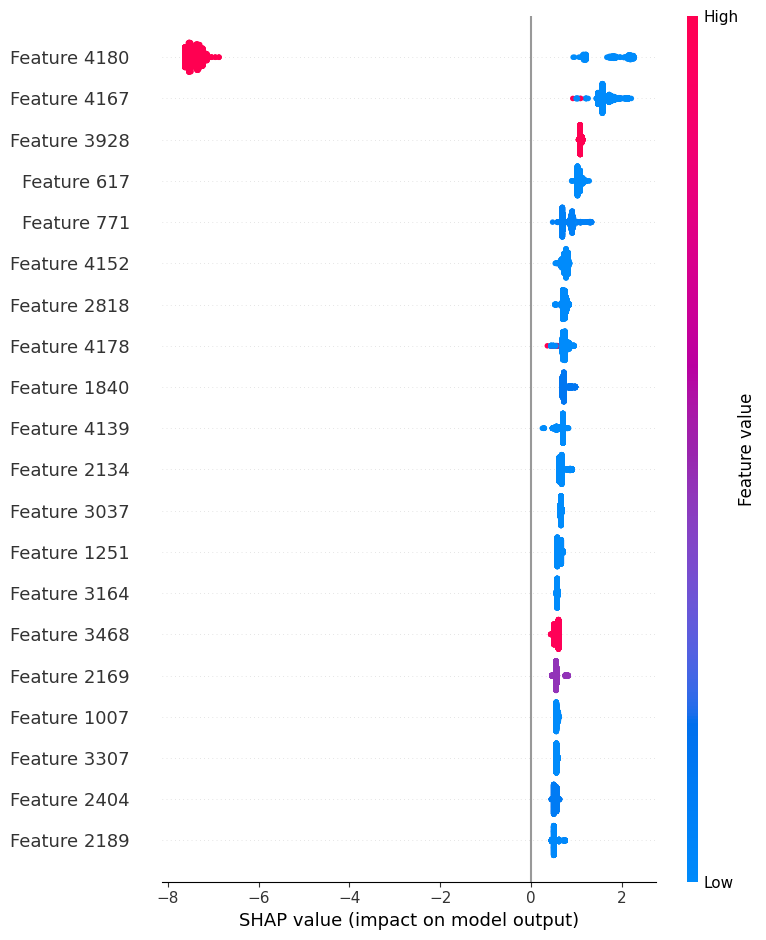

In [ ]:
shap.summary_plot(shap_values, X_sample)

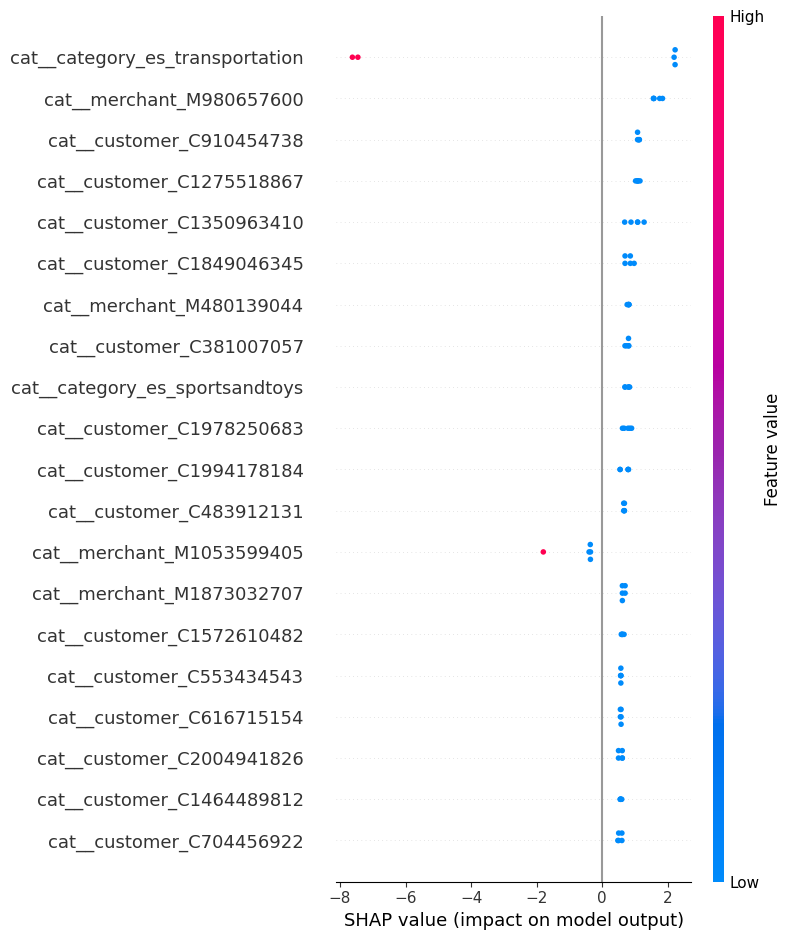

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_names = preprocessor.get_feature_names_out()


shap.summary_plot(shap_values, X_sample, feature_names=feature_names)
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Sample a few rows from your test set (convert to dense if sparse)
X_sample = X_test[:5]
if hasattr(X_sample, "toarray"):
    X_sample = X_sample.toarray()

# Create DataFrame with feature names
X_sample_df = pd.DataFrame(X_sample, columns=preprocessor.get_feature_names_out())

# Create TreeExplainer explicitly
explainer = shap.TreeExplainer(best_xgb_model)

# Get SHAP values
shap_values = explainer.shap_values(X_sample_df)

# Force plot for the first sample
shap.plots.force(explainer.expected_value, shap_values[0], X_sample_df.iloc[0])
